In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Introduction

In this notebook you will learn how to implement a naive gradient descent algorithm for a machine learning model with a single trainable parameter.

In reality, models will have many more parameters. But since we are using a single parameter, we can visualize the gradient descent behaviour. This will be very helpful for understanding the algorithm.

To achive this, we will fit a line to a small dataset with one input and one output variable. This means finding the slope and the intercept of the line, given a dataset (X, y).

$ y = slope * x + intercept $

But this model still has two parameters, slope (or weight) and the y_intercept (or bias).

We will keep the intercept at zero so that we only have one parameter to find.

$ y = weight * x + 0 $


In [2]:
X = np.array([5.57437646, 8.29649879, 2.76550707, 3.31084857, 2.15568324,
              6.78187318, 2.71542898, 3.56426356, 6.57516335, 7.09686466,
              7.8494032 , 9.8871235 , 4.87568879, 6.63442367, 4.87402536,
              7.7129583 , 6.94567421, 2.34017854, 6.03420865, 6.83534415])

In [3]:
y = np.array([13.17988756, 23.35179248,  8.48645234,  8.64750281,  5.07626627,
              17.92304241,  6.7051585 ,  8.97522423, 15.94414851, 19.28671018,
              19.46941448, 24.7421289 , 12.50352989, 18.07593665, 14.98462463,
              20.41706221, 20.2718029 ,  4.15552149, 16.87010359, 18.04898062])

The dataset is generated for you as X and y. Let's plot these datapoints together with lines $y = weight*x$.

In [4]:
def line_plotter(weights):
    '''
    This function plots the dataset as a scatter plot
    
    and
    
    it plots the lines y = weight*x
    
    Arguments
     weights: a list of weights
    
    '''
    plt.scatter(X, y)
    plt.ylabel('y')
    plt.xlabel('x')
    for i, weight in enumerate(weights):
        line_text= f'Weight: {np.round(weight, 2)}, index={i}'
        plt.plot([0, 10], [0, 10*weight], label=line_text)
    plt.legend()

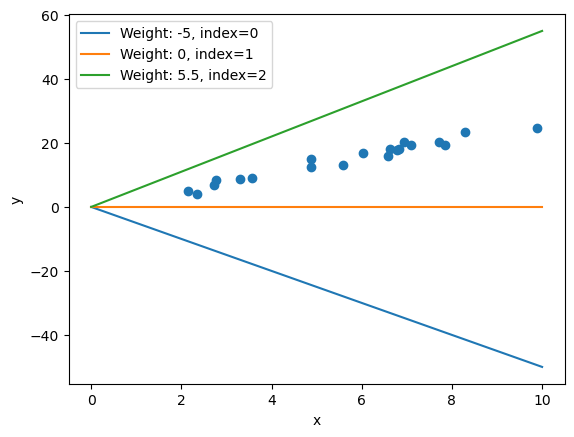

In [5]:
# Three lines with different slopes, together with the dataset
line_plotter(weights=[-5, 0, 5.5])

**Exercise 1:** use the line plotter to adjust the weight and find the best fitting line.

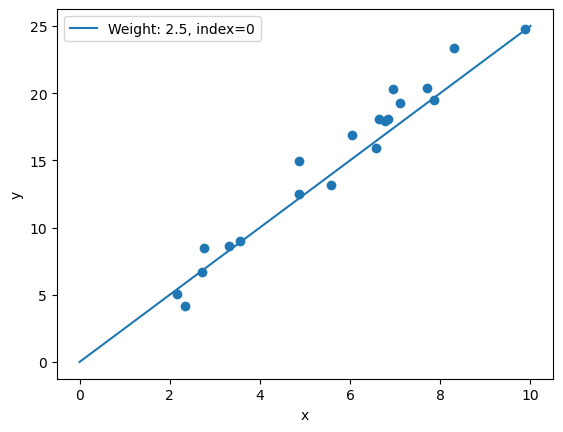

In [6]:
line_plotter(weights=[2.5])

# Gradient Descent

Now we will describe and implement a naive gradient descent algorithm to find the weight. At the end, you will compare this weight with your guess from exercise 1.

Here are the steps of the naive gradient descent algorithm we will implement:

1. Randomly initialize model parameters (in our case a single parameter, weight)
2. Calculate the predictions
3. Calculate the mean square error (loss) between the predictions and the labels
4. Add an epsilon to the weight
5. Calculate the loss_epsilon using weight+epsilon
6. Calculate $\frac{loss\_epsilon-loss}{\epsilon}$
7. Update the weight with $new\_weight = weight - learning\_rate*\frac{loss\_epsilon-loss}{\epsilon}$
8. Calculate the new loss after the weight update.
9. Repeat steps 2-8 for a fixed number of epochs.

Let's build this algorithm step by step. Gradient descent needs a starting model. We will do this by randomly picking a weight. This will be our untrained model.

1. Randomly initialize model parameters (in our case a single parameter, weight)

In [7]:
def initializer():
    return np.random.randn()

In [8]:
weight = initializer()
weight

2.1426729266889115

**Exercise 2:** Do you expect this weight to be a good one? Why or why not? Use `line_plotter` to plot the line corresponding to this weight. Repeat the `initializer()` a few times to see different starting models.

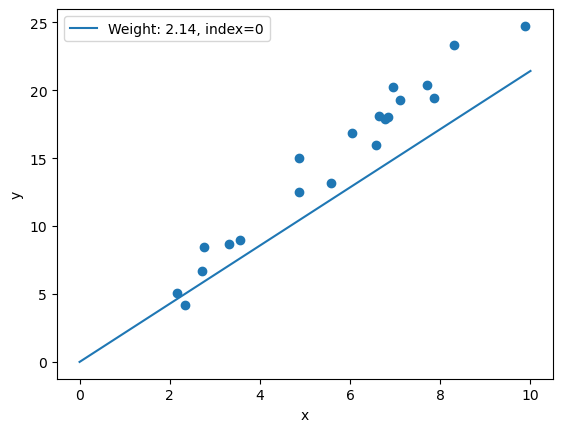

In [9]:
line_plotter([weight])

Now we can get predictions from this model.

The naive gradient descent algorithm:

1. Randomly initialize model parameters (in our case a single parameter, weight)
2. **Calculate the predictions**

In [10]:
def predict(X, weight, bias=0):
    
    return X*weight + bias

In [11]:
y_pred = predict(X, weight, bias=0)

In [12]:
arr = np.concatenate((y_pred.reshape(-1, 1), y.reshape(-1, 1)), axis=1)
pd.DataFrame(arr, columns=['Random predictions (y_pred)', 'Labels (y)'])

,Random predictions (y_pred),Labels (y)
0,11.944066,13.179888
1,17.776683,23.351792
2,5.925577,8.486452
3,7.094066,8.647503
4,4.618924,5.076266
5,14.531336,17.923042
6,5.818276,6.705158
7,7.637051,8.975224
8,14.088424,15.944149
9,15.206260,19.286710


And by comparing the predictions to the labels we can calculate the error. We will use the mean squared error (MSE). We can use another function to calculate the error, but for this exercise we will use the MSE.

This function is called the `loss function` which calculates the `loss`. It is sometimes referred to as the cost function.

The naive gradient descent algorithm:

1. Randomly initialize model parameters (in our case a single parameter, weight)
2. Calculate the predictions
3. **Calculate the mean square error (loss) between the predictions and the labels**

In [13]:
from sklearn.metrics import mean_squared_error

loss = mean_squared_error(y, y_pred)

print('Weight:', weight)
print('Loss:', loss)

Weight: 2.1426729266889115
Loss: 10.371611395218073


Let's start plotting loss vs weight. This will help us see if our weight updates decrease loss.

Text(0, 0.5, 'Loss')

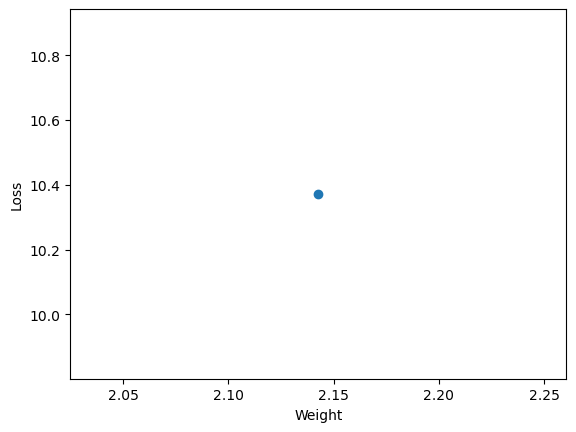

In [14]:
plt.scatter(weight, loss)
plt.xlabel('Weight')
plt.ylabel('Loss')

Now we would like to update the weight so that the loss decreases slightly. This is what gradient descent update rule does:

$new\_weight = weight - learning\_rate*\frac{dloss\_function}{dweight}$

such that the model defined by the `new_weight` is **better** than our first model defined by the random `weight`. Better here refers to a lower loss.

This is the case because if the derivative is positive, an increase in the weight increases the loss. Since we want to decrease the loss we go in the opposite direction of the derivative. We use learning rate to control the amount of the update.

We will estimate $\frac{dloss\_function}{dweight}$ with $\frac{\Delta loss\_function}{\Delta weight}$. How? When $\Delta weight$ is small:

$\frac{dloss\_function}{dweight} \approx \frac{\Delta loss\_function}{\Delta weight}$

In math, epsilon ($\epsilon$) is used indicate small numbers. We will add an $\epsilon$ to the weight and calculate loss_epsilon (loss of the model with weight = weight + epsilon).

$\frac{\Delta loss\_function}{\Delta weight} = \frac{loss\_epsilon-loss}{weight+\epsilon - weight}= \frac{loss\_epsilon-loss}{\epsilon}$

Gradient update rule becomes:

$new\_weight = weight - learning\_rate*\frac{loss\_epsilon-loss}{\epsilon}$

Let's add these steps to our algorithm:

1. Randomly initialize model parameters (in our case a single parameter, weight)
2. Calculate the predictions
3. Calculate the mean square error (loss) between the predictions and the labels
4. **Add an epsilon to the weight**
5. **Calculate the loss_epsilon using weight+epsilon**
6. **Calculate $\frac{loss\_epsilon-loss}{\epsilon}$**
7. **Update the weight with $new\_weight = weight - learning\_rate*\frac{loss\_epsilon-loss}{\epsilon}$**
8. **Calculate the new loss after the weight update.**

**Exercise 3:** Complete steps 4 and 5 below.

In [15]:
# Steps 4&5
epsilon = 0.001
y_pred_epsilon = predict(X, weight+epsilon)
loss_epsilon = mean_squared_error(y, y_pred_epsilon)

**Exercise 4:** Complete step 6 using $derivative\_estimate = \frac{loss\_epsilon-loss}{\epsilon}$

In [16]:
# Step 6
derivative_estimate = (loss_epsilon - loss)/epsilon
print(derivative_estimate)

-36.355349124344016


**Exercise 5:** Complete step 7, $new\_weight = weight - learning\_rate*\frac{loss\_epsilon-loss}{\epsilon}$

In [17]:
# Step 7
lr = 0.003
new_weight = weight - lr * derivative_estimate

In [18]:
# Step 8
new_y_pred = predict(X, new_weight)
new_loss = mean_squared_error(y, new_y_pred)

If you plot the weight and loss before and after the update, you should be able to see that the loss indeed decreases.

Text(0, 0.5, 'Loss')

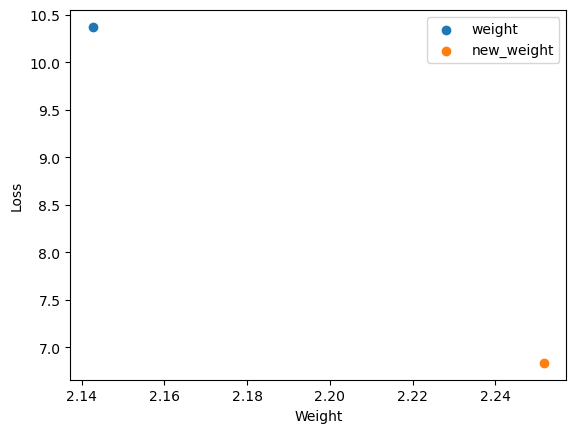

In [19]:
plt.scatter(weight, loss, label='weight')
plt.scatter(new_weight, new_loss, label = 'new_weight')
plt.legend()
plt.xlabel('Weight')
plt.ylabel('Loss')

Let's plot the models with random weight and updated weight to visually confirm that the updated weight gives us a better fitting model.

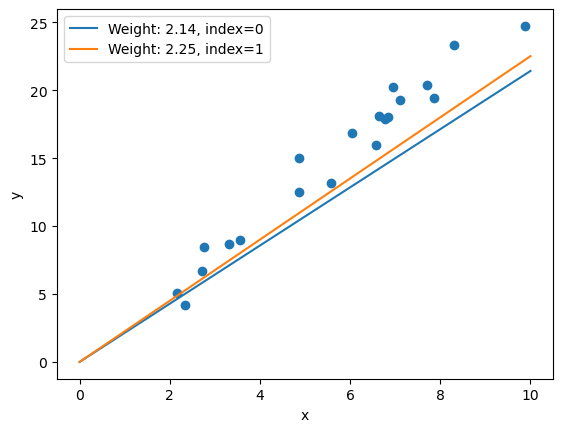

In [20]:
line_plotter([weight, new_weight])

We are almost done! Now it is time to repeat steps 2-8 a certain number of times (called epochs) so that we keep decreasing the loss.

1. Randomly initialize model parameters (in our case a single parameter, weight)
2. Calculate the predictions
3. Calculate the mean square error (loss) between the predictions and the labels
4. Add an epsilon to the weight
5. Calculate the loss_epsilon using weight+epsilon
6. Calculate $\frac{loss\_epsilon-loss}{\epsilon}$
7. Update the weight with $new\_weight = weight - learning\_rate*\frac{loss\_epsilon-loss}{\epsilon}$
8. Calculate the new loss after the weight update.
9. **Repeat steps 2-8 for a fixed number of epochs.**

**Exercise 6:** Put together the steps to create the naive gradient descent algorithm we defined so far.

In [21]:
def naive_gradient_descent(X, y, epochs, epsilon, lr):
   
    weights = []
    losses = []

    weight = initializer()
    y_pred = predict(X, weight)
    loss = mean_squared_error(y, y_pred)

    weights.append(weight)
    losses.append(loss)

    for i in range(epochs):

        # Estimate derivate
        y_pred_epsilon = predict(X, weight+epsilon)
        loss_epsilon = mean_squared_error(y, y_pred_epsilon)
        derivative_estimate = (loss_epsilon - loss)/epsilon

        # Gradient descent update rule
        weight = weight - lr * derivative_estimate

        # New loss
        y_pred = predict(X, weight)
        loss = mean_squared_error(y, y_pred)

        # Save new weight and loss
        weights.append(weight)
        losses.append(loss)
        
    return weights, losses

In [22]:
weights, losses = naive_gradient_descent(X, y, epochs=5, epsilon=0.001, lr=0.003)

Text(0, 0.5, 'Loss')

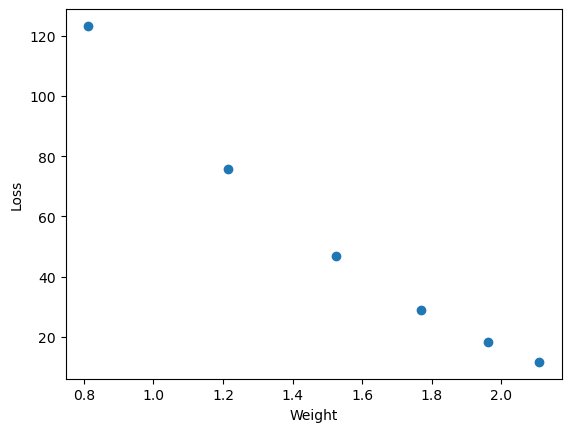

In [23]:
plt.scatter(weights, losses)
plt.xlabel('Weight')
plt.ylabel('Loss')

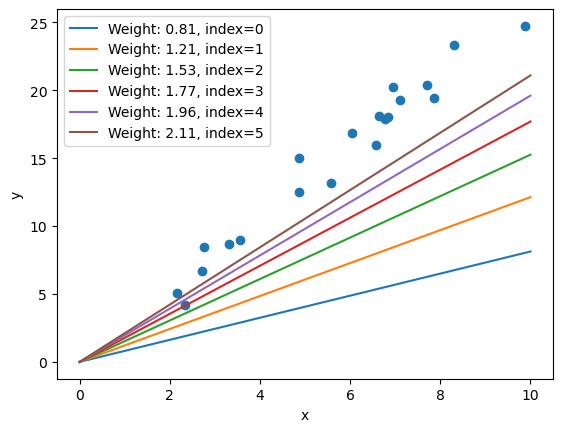

In [24]:
line_plotter(weights)

**Exercise 7**: Compare your guess from exercise 1 to the weight learned from gradient descent. Do you think 5 epochs is enough, or increasing the number of epochs will improve the model?

**Exercise 8:** Change learning rate and the number of epochs to observe the effect of these hyperparameters to learning. For example what happens when the learning rate it very small (0.0001) or very large (10).

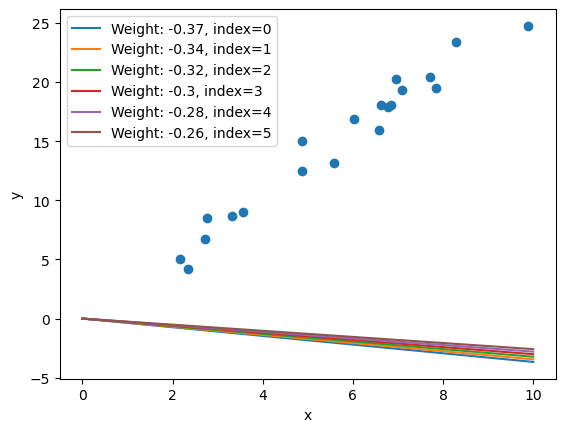

In [25]:
weights, losses = naive_gradient_descent(X, y, epochs=5, epsilon=0.001, lr=0.0001)
line_plotter(weights)

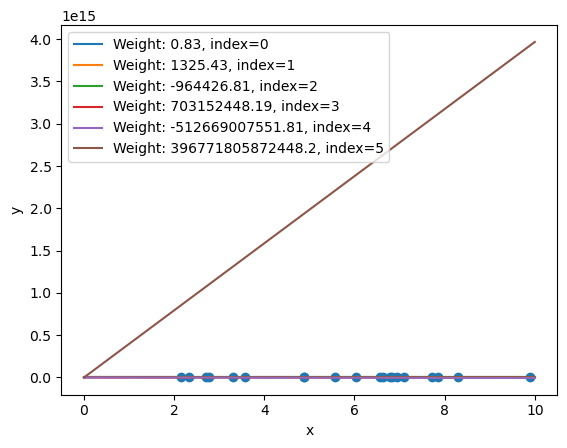

In [26]:
weights, losses = naive_gradient_descent(X, y, epochs=5, epsilon=0.001, lr=10)
line_plotter(weights)

**Exercise 9:** The weight I used to generate this dataset was 2.723. Compare this to your initial guess and the result of the gradient descent. Change learning rate and epochs to get as close as possible to this number with our naive GD algorithm.

Final weight: 2.6406324604316476


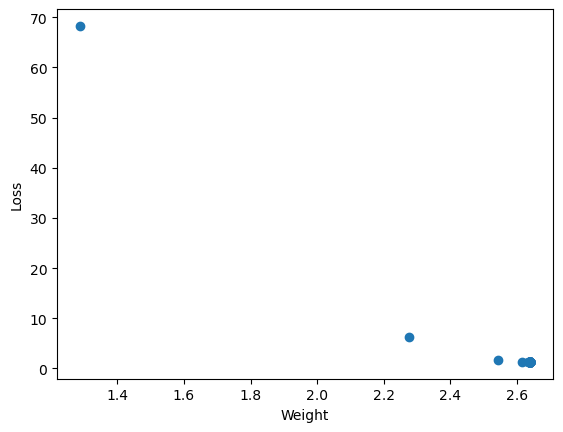

In [27]:
weights, losses = naive_gradient_descent(X, y, epochs=100, epsilon=0.001, lr=0.01)
plt.scatter(weights, losses)
plt.xlabel('Weight')
plt.ylabel('Loss')
print('Final weight:', weights[-1])

**Exercise 10:** The data generating code is provide below. Increase the number of data points to 100 (or more) to see if you can approach the `weight = 2.723`.

Text(0.5, 0, 'x')

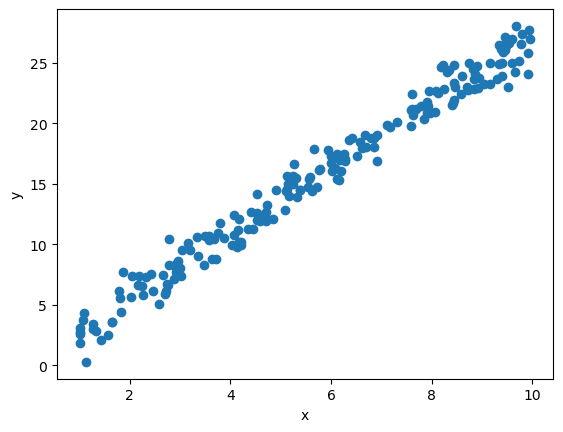

In [28]:
# number of training data
n = 200

bias = 0 # y intercept
weight = 2.723 # slope

X = np.random.uniform(1, 10, n) 
y = weight * X + bias + np.random.randn(n) # random noise added

plt.scatter(X, y)
plt.ylabel('y')
plt.xlabel('x')

Final weight: 2.721533820281074


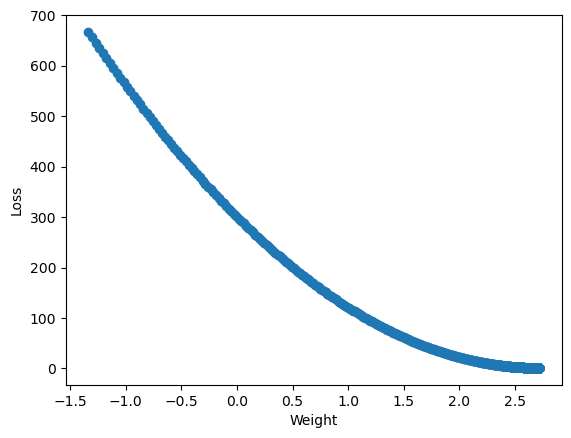

In [29]:
weights, losses = naive_gradient_descent(X, y, epochs=1000, epsilon=0.001, lr=0.0001)
plt.scatter(weights, losses)
plt.xlabel('Weight')
plt.ylabel('Loss')
print('Final weight:', weights[-1])